<a href="https://colab.research.google.com/github/vedikakapoor-11/ML/blob/main/bmlexp_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

data = pd.read_csv('/content/Diabetes (1).csv')
data.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
import pandas as pd
# 1. Data Cleaning
data = pd.read_csv('/content/Diabetes (1).csv')

# Remove duplicates and handle missing values
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)

# Identify numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Display summary statistics for numerical columns
print("Summary Statistics for Numerical Columns:")
print(data[numerical_columns].describe())

print("Data Cleaning Completed. Shape of Data:", data.shape)

Summary Statistics for Numerical Columns:
       pregnancies     glucose   diastolic     triceps     insulin  \
count   768.000000  768.000000  768.000000  768.000000  768.000000   
mean      3.845052  120.894531   69.105469   20.536458   79.799479   
std       3.369578   31.972618   19.355807   15.952218  115.244002   
min       0.000000    0.000000    0.000000    0.000000    0.000000   
25%       1.000000   99.000000   62.000000    0.000000    0.000000   
50%       3.000000  117.000000   72.000000   23.000000   30.500000   
75%       6.000000  140.250000   80.000000   32.000000  127.250000   
max      17.000000  199.000000  122.000000   99.000000  846.000000   

              bmi         dpf         age    diabetes  
count  768.000000  768.000000  768.000000  768.000000  
mean    31.992578    0.471876   33.240885    0.348958  
std      7.884160    0.331329   11.760232    0.476951  
min      0.000000    0.078000   21.000000    0.000000  
25%     27.300000    0.243750   24.000000    0.

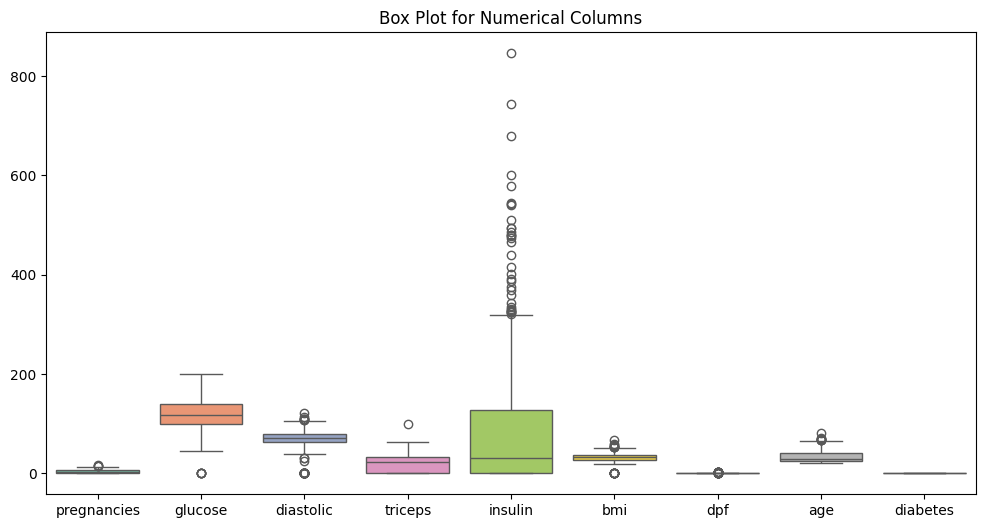

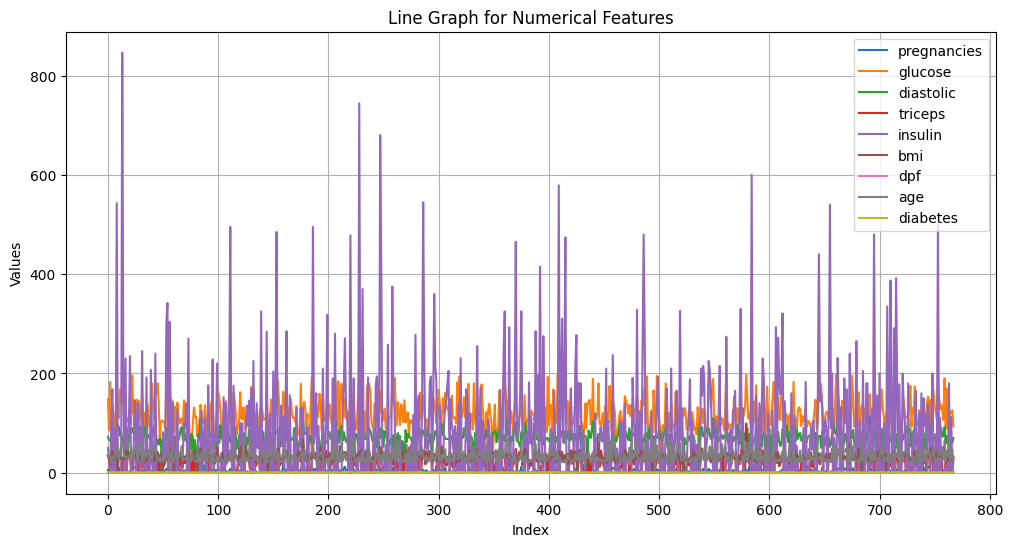

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Box Plotting Graphs
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[numerical_columns], palette='Set2')
plt.title('Box Plot for Numerical Columns')
plt.show()

# Line Graph
plt.figure(figsize=(12, 6))
for column in numerical_columns:
    plt.plot(data.index, data[column], label=column)

plt.title("Line Graph for Numerical Features")
plt.xlabel("Index")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.show()

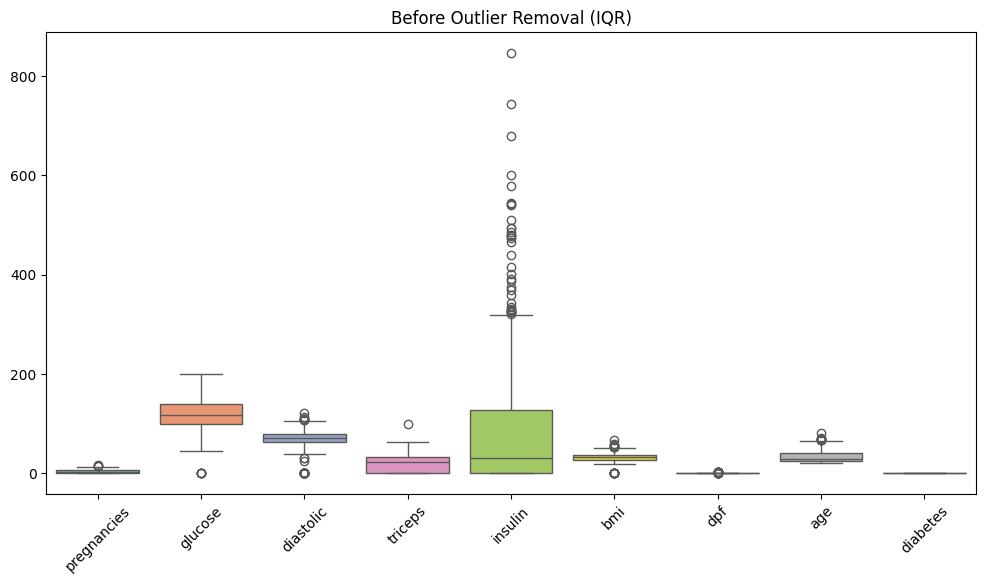

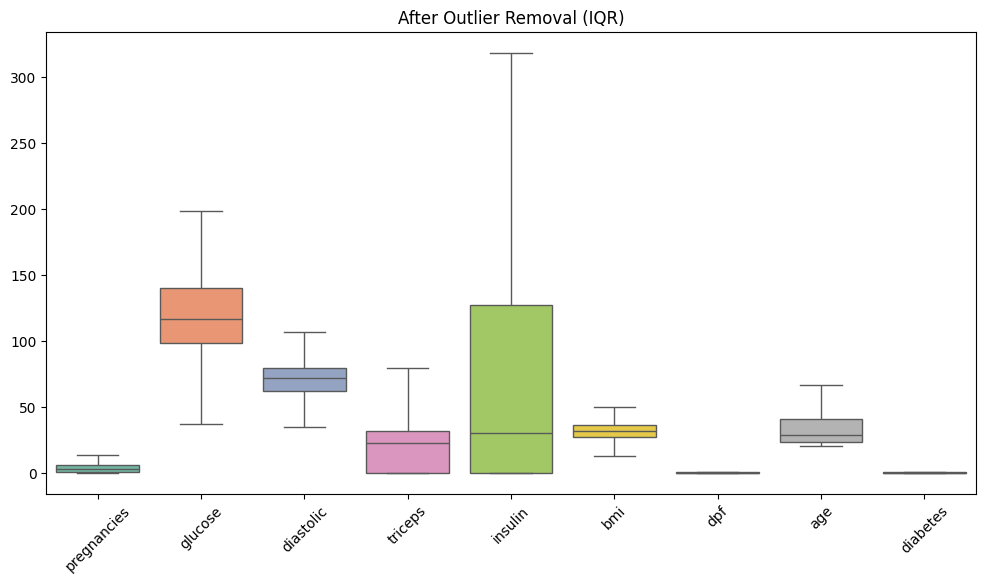

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Outlier Detection using IQR
# Plot Before Outlier Removal
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[numerical_columns], palette='Set2')
plt.title('Before Outlier Removal (IQR)')
plt.xticks(rotation=45)
plt.show()

# Outlier Capping using IQR
for column in numerical_columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

# Plot After Outlier Removal
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[numerical_columns], palette='Set2')
plt.title('After Outlier Removal (IQR)')
plt.xticks(rotation=45)
plt.show()

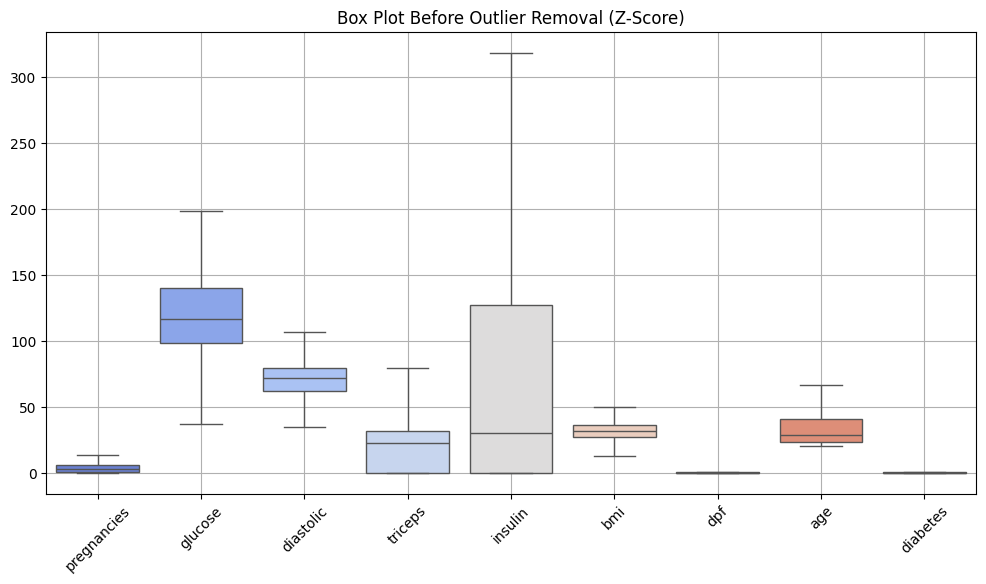

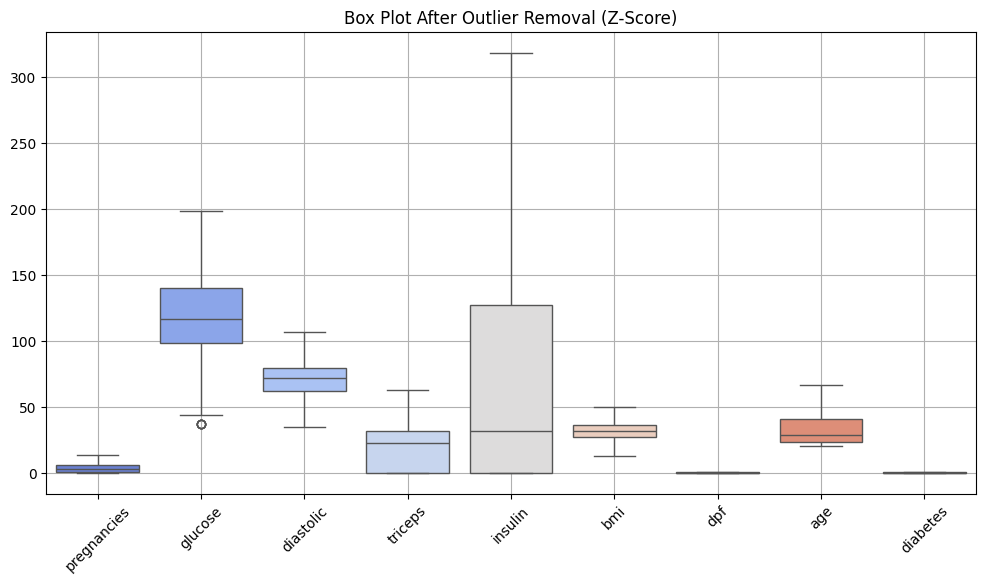

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# 3. Outlier Detection using Z-Score

# Copy original data
data_zscore = data.copy()

# Box Plot Before Outlier Removal
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_zscore[numerical_columns], palette='coolwarm')
plt.title('Box Plot Before Outlier Removal (Z-Score)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Outlier Removal using Z-Score
z_scores = np.abs(zscore(data_zscore[numerical_columns]))
data_zscore[numerical_columns] = np.where(z_scores > 3, np.nan, data_zscore[numerical_columns])
data_zscore.dropna(inplace=True)

# Box Plot After Outlier Removal
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_zscore[numerical_columns], palette='coolwarm')
plt.title('Box Plot After Outlier Removal (Z-Score)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

# 4. Encoding
categorical_columns = data.select_dtypes(include=['object']).columns
label_encoders = {}

for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

print("Encoding Completed. Encoded categorical columns:", categorical_columns.tolist())


Encoding Completed. Encoded categorical columns: []


Decision Tree Accuracy: 0.79


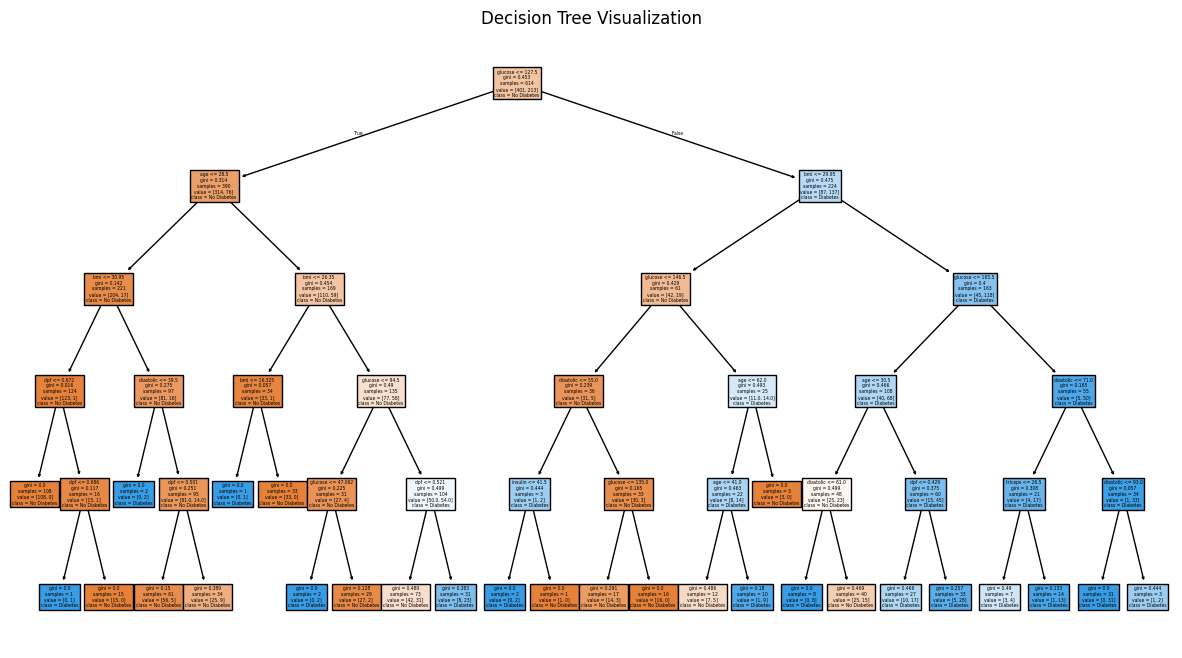

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Define target variable
target_column = 'diabetes'
X = data.drop(columns=[target_column])
y = data[target_column]

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Decision Tree Classifier
dt = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred_dt = dt.predict(X_test)

# Accuracy
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {dt_accuracy:.2f}')

# Visualizing the Decision Tree
plt.figure(figsize=(15, 8))
plot_tree(dt, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

Scikit-learn KNN Accuracy: 0.73


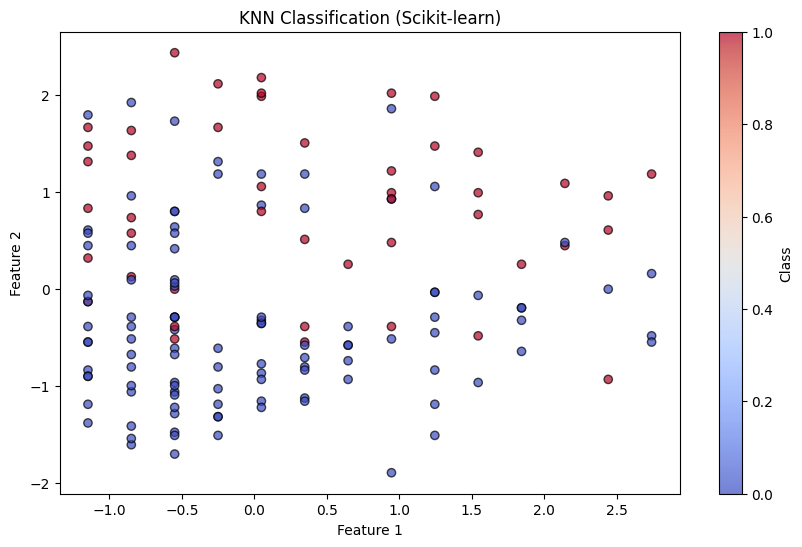

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Evaluate accuracy
sklearn_accuracy = knn.score(X_test, y_test)
print(f'Scikit-learn KNN Accuracy: {sklearn_accuracy:.2f}')

# Plot KNN classification results
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=knn.predict(X_test), cmap='coolwarm', edgecolors='k', alpha=0.7)
plt.title('KNN Classification (Scikit-learn)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Class')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('/content/Diabetes (1).csv')

# Feature columns
X = data[['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi', 'dpf', 'age']]

# Label column (target)
y = data['diabetes']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to calculate Euclidean distance
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

# Function to perform KNN
def knn(X_train, X_test, y_train, k):
    predictions = []
    for i in range(len(X_test)):
        distances = []

        # Calculate the distance from each point in the training set
        for j in range(len(X_train)):
            dist = euclidean_distance(X_test.iloc[i], X_train.iloc[j])
            distances.append((dist, y_train.iloc[j]))

        # Sort by distance and get the k nearest neighbors
        distances.sort(key=lambda x: x[0])
        neighbors = distances[:k]

        # Get the most common class among the k nearest neighbors
        neighbor_classes = [neighbor[1] for neighbor in neighbors]
        most_common = np.bincount(neighbor_classes).argmax()

        # Append the prediction for the current test instance
        predictions.append(most_common)

    return predictions

# Choose the value of k (e.g., k=3)
k = 3

# Perform KNN on the test data
y_pred = knn(X_train, X_test, y_train, k)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN with k={k}: {accuracy * 100:.2f}%")


Accuracy of KNN with k=3: 64.94%


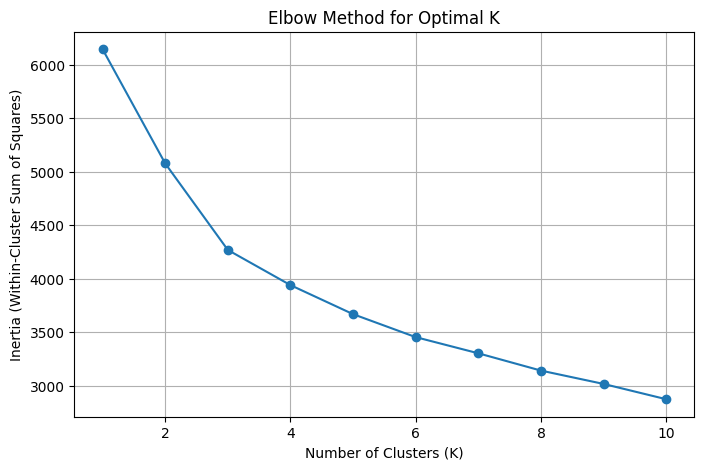

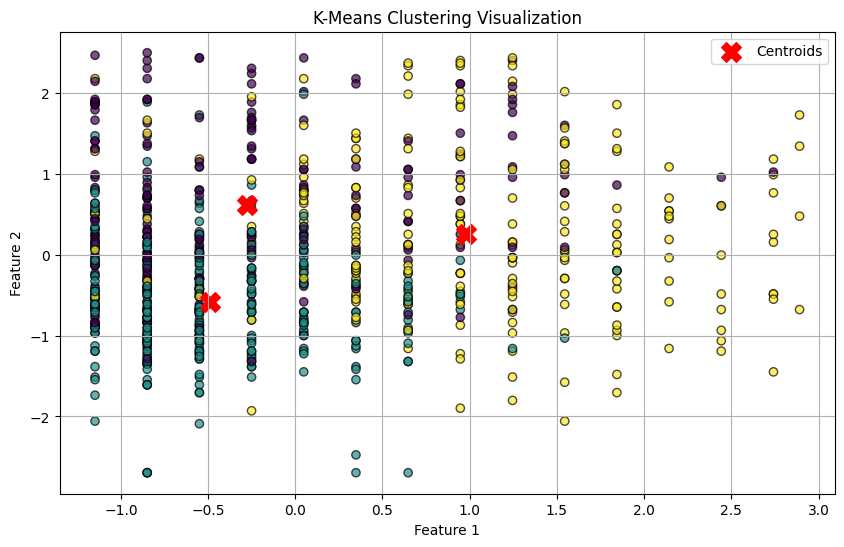

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Choosing the number of clusters using the Elbow Method
inertia = []
K_range = range(1, 11)  # Checking for 1 to 10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Graph
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

# Applying K-Means with the chosen K (assume K=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Adding cluster labels to data
data['Cluster'] = clusters

# Plotting Clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', edgecolors='k', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label="Centroids")
plt.title('K-Means Clustering Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

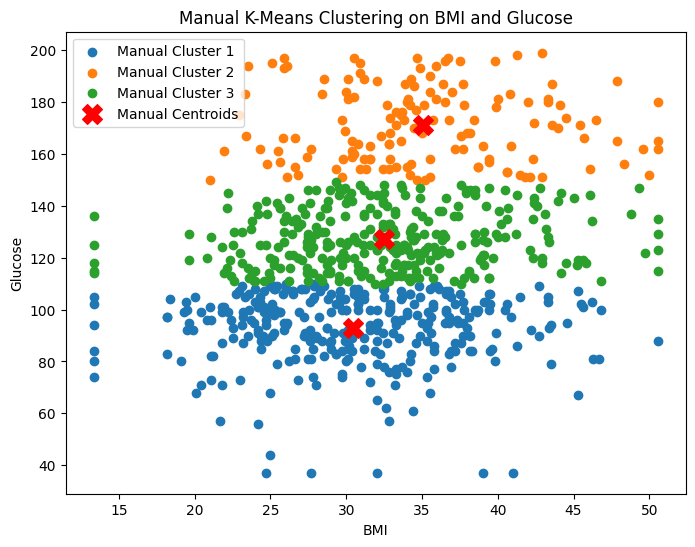

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def k_means_manual(X, k, max_iters=100, tol=1e-4):
    np.random.seed(42)  # Ensure reproducibility
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]

    for _ in range(max_iters):
        clusters = [[] for _ in range(k)]
        for point in X:
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            cluster_idx = np.argmin(distances)
            clusters[cluster_idx].append(point)

        new_centroids = np.array([np.mean(cluster, axis=0) if len(cluster) > 0 else centroids[i]
                                  for i, cluster in enumerate(clusters)])
        if np.all(np.abs(new_centroids - centroids) < tol):
            break
        centroids = new_centroids

    return centroids, clusters

# Extract features (BMI, Glucose)
X_manual = data[['bmi', 'glucose']].values

# Run Manual K-Means
k_manual = 3
centroids_manual, clusters_manual = k_means_manual(X_manual, k_manual)

# Plot Clusters for Manual K-Means
plt.figure(figsize=(8, 6))
for i, cluster in enumerate(clusters_manual):
    cluster = np.array(cluster)
    plt.scatter(cluster[:, 0], cluster[:, 1], label=f'Manual Cluster {i+1}')
plt.scatter(centroids_manual[:, 0], centroids_manual[:, 1], s=200, c='red', marker='X', label="Manual Centroids")
plt.title("Manual K-Means Clustering on BMI and Glucose")
plt.xlabel("BMI")
plt.ylabel("Glucose")
plt.legend()
plt.show()

In [ ]:
#experiment 6:-random forest

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
data = pd.read_csv('/content/Diabetes (1).csv')

# Separate features and target
X = data.drop('diabetes', axis=1)  # Features
y = data['diabetes']

# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7207792207792207

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154


Confusion Matrix:
 [[77 22]
 [21 34]]


In [ ]:
#experiment 10
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('/content/Diabetes (1).csv')

# Shuffle the dataset
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Divide into 3 equal parts (768 / 3 = 256)
part1 = data[:256]
part2 = data[256:512]
part3 = data[512:]

# Function to train and evaluate Random Forest on a part
def train_and_evaluate(part):
    X = part.drop('diabetes', axis=1)
    y = part['diabetes']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Run for all 3 parts
acc1 = train_and_evaluate(part1)
acc2 = train_and_evaluate(part2)
acc3 = train_and_evaluate(part3)

# Average accuracy
avg_accuracy = (acc1 + acc2 + acc3) / 3

# Output results
print(f"Accuracy on Part 1: {acc1:.4f}")
print(f"Accuracy on Part 2: {acc2:.4f}")
print(f"Accuracy on Part 3: {acc3:.4f}")
print(f"\nAverage Accuracy over all 3 parts: {avg_accuracy:.4f}")


Accuracy on Part 1: 0.7115
Accuracy on Part 2: 0.7692
Accuracy on Part 3: 0.7500

Average Accuracy over all 3 parts: 0.7436
